In [47]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

In [105]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')
energy_efficiency_data

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
3,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
4,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38
5,0.90,563.5,318.5,122.50,7.0,4.0,0.0,0.0,20.71,25.16
6,0.86,588.0,294.0,147.00,7.0,2.0,0.0,0.0,19.50,27.30
7,0.86,588.0,294.0,147.00,7.0,3.0,0.0,0.0,19.95,21.97
8,0.86,588.0,294.0,147.00,7.0,4.0,0.0,0.0,19.34,23.49
9,0.82,612.5,318.5,147.00,7.0,3.0,0.0,0.0,17.41,21.46


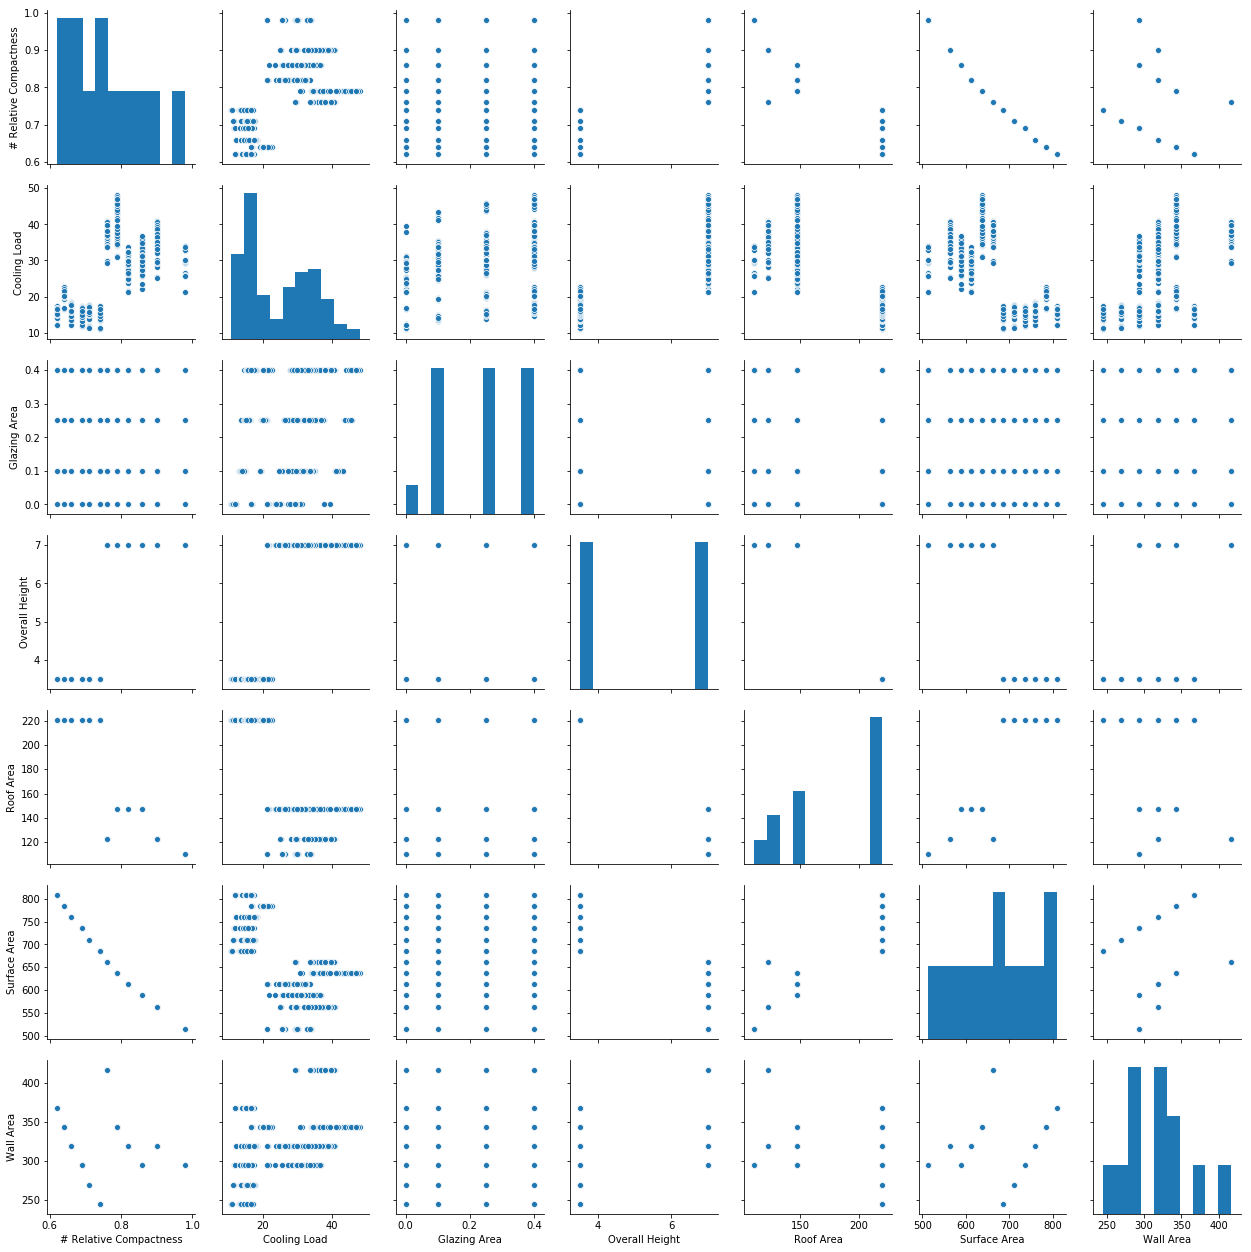

In [100]:
energy_efficiency_data = energy_efficiency_data[energy_efficiency_data.columns.difference(['Orientation', 'Glazing Area Distribution', 'Heating Load'])]
energy_efficiency_data
sns.pairplot(energy_efficiency_data)

In [113]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')

keep_data = energy_efficiency_data[['Heating Load', 'Orientation', 'Glazing Area Distribution']]
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Heating Load', 'Orientation', 'Glazing Area Distribution', 'Cooling Load'])
energy_efficiency_data = energy_efficiency_data[energy_efficiency_data.columns.difference(['Orientation', 'Glazing Area Distribution', 'Heating Load'])]

x = energy_efficiency_data.values
Normalizer = preprocessing.Normalizer()
x_scaled = Normalizer.fit_transform(x)
energy_efficiency_data = pd.DataFrame(x_scaled, columns=energy_efficiency_data.columns)
energy_efficiency_data = energy_efficiency_data.join(keep_data)

categories = {1: 'uniform', 2: 'north', 3: 'east', 4: 'south', 5: 'west'}

for elem in energy_efficiency_data['Orientation'].unique():
    energy_efficiency_data['Orientation-'+categories[elem]] \
                                = (energy_efficiency_data['Orientation'] == elem).astype(int)
    
for elem in energy_efficiency_data['Glazing Area Distribution'].unique():
    if elem == 0:
        continue
    energy_efficiency_data['Glazing Area Distribution-'+categories[elem]] \
                                = (energy_efficiency_data['Glazing Area Distribution'] == elem).astype(int)
    
energy_efficiency_data = energy_efficiency_data.drop_duplicates()
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Orientation', 'Glazing Area Distribution'])
energy_efficiency_data

,# Relative Compactness,Glazing Area,Overall Height,Roof Area,Surface Area,Wall Area,Heating Load,Orientation-north,Orientation-south,Orientation-west,Orientation-east,Glazing Area Distribution-uniform,Glazing Area Distribution-north,Glazing Area Distribution-east,Glazing Area Distribution-south,Glazing Area Distribution-west
0,0.001626,0.000000,0.011613,0.182901,0.853536,0.487735,15.55,1,0,0,0,0,0,0,0,0
1,0.001626,0.000000,0.011613,0.182901,0.853536,0.487735,15.55,0,1,0,0,0,0,0,0,0
2,0.001626,0.000000,0.011613,0.182901,0.853536,0.487735,15.55,0,0,1,0,0,0,0,0,0
3,0.001366,0.000000,0.010625,0.185941,0.855330,0.483447,20.84,1,0,0,0,0,0,0,0,0
4,0.001366,0.000000,0.010625,0.185941,0.855330,0.483447,21.46,0,0,0,1,0,0,0,0,0
5,0.001366,0.000000,0.010625,0.185941,0.855330,0.483447,20.71,0,1,0,0,0,0,0,0,0
6,0.001277,0.000000,0.010391,0.218206,0.872824,0.436412,19.50,1,0,0,0,0,0,0,0,0
7,0.001277,0.000000,0.010391,0.218206,0.872824,0.436412,19.95,0,0,0,1,0,0,0,0,0
8,0.001277,0.000000,0.010391,0.218206,0.872824,0.436412,19.34,0,1,0,0,0,0,0,0,0
9,0.001162,0.000000,0.009917,0.208253,0.867719,0.451214,17.41,0,0,0,1,0,0,0,0,0


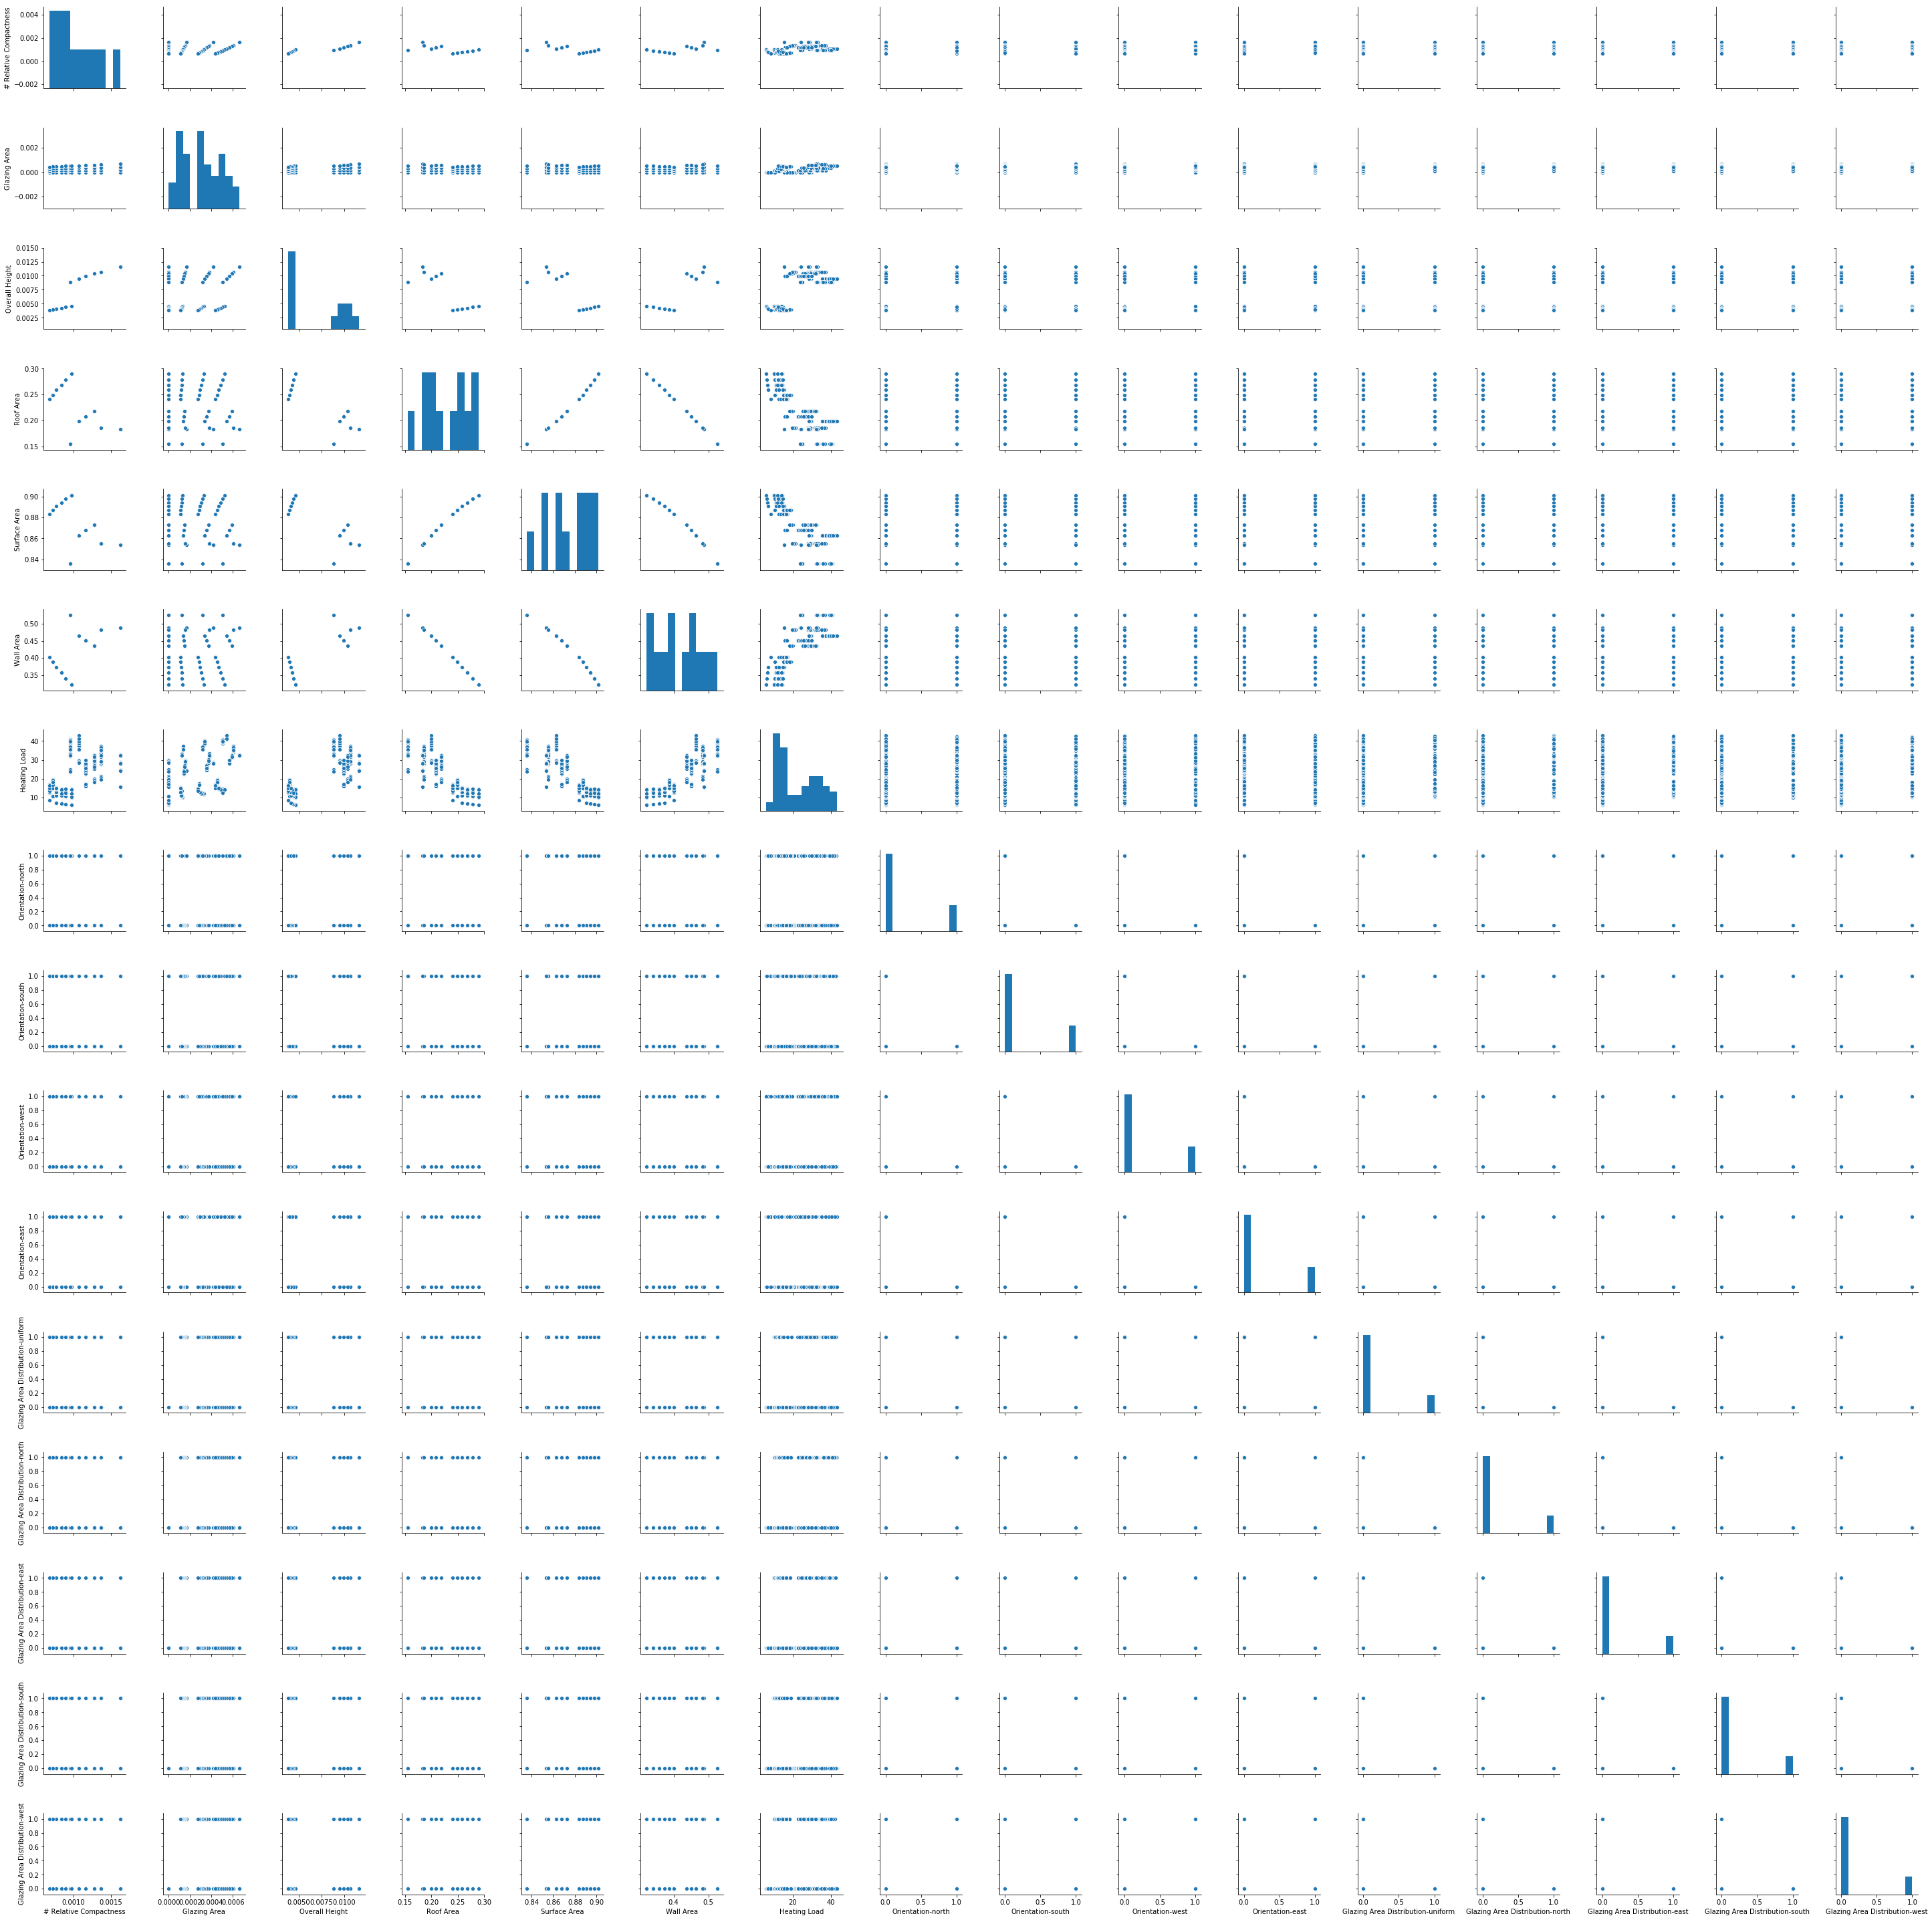

In [114]:
sns.pairplot(energy_efficiency_data)

In [115]:
num_examples = len(energy_efficiency_data)

split_mask = np.random.rand(num_examples) < 0.75
train = energy_efficiency_data[split_mask]
test = energy_efficiency_data[~split_mask]

In [117]:
y_test = np.array(test['Heating Load'].as_matrix().reshape(1, len(test['Heating Load'])))
y_test = y_test.transpose()
X_test = np.array(test.drop(axis=1, columns=['Heating Load']))

y_train = np.array(train['Heating Load'].as_matrix().reshape(1, len(train['Heating Load'])))
y_train = y_train.transpose()
X_train = np.array(train.drop(axis=1, columns=['Heating Load']))

/home/cgilab/working/deeplearning/DLhw1/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/cgilab/working/deeplearning/DLhw1/env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [136]:
class NeuralNetwork:
    def __init__(self, nn_architecture = [15, 10, 10, 1], learning_rate = 0.01):
        self.W = []
        for i in range(1, len(nn_architecture)):
            self.W.append(np.random.rand(nn_architecture[i], nn_architecture[i-1]))

        self.learning_rate = learning_rate
        
    def feedforward(self, X):
        self.hidden_layer = self.sigmoid(np.dot(X, self.W1))
        self.output = np.dot(self.hidden_layer, self.W2)
#         print self.output
        return self.output
        
    def backprop(self, X, y, y_hat):
        # backward propagate through the network
        error = (y - y_hat) * (y - y_hat) # error in output
#         print error
        slope_output_layer = y_hat
        slope_hidden_layer = self.derivatives_sigmoid(self.hidden_layer)
        d_output = error * 1
        
        error_at_hidden_layer = d_output.dot(self.W2.T)
        d_hiddenlayer = error_at_hidden_layer * slope_hidden_layer
#         print X.T.dot(d_hiddenlayer)
        self.W1 -= self.learning_rate * X.T.dot(d_hiddenlayer)
        self.W2 -= self.learning_rate * self.hidden_layer.T.dot(d_output) #self.hidden_layer.T.dot(d_output)
#         self.b1 -= self.learning_rate * X.T.dot(d_hiddenlayer)
#         self.b2 -= self.learning_rate * self.hidden_layer.T.dot(d_output)
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def derivatives_relu(self, x):
        return (x > 0).astype(int)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def derivatives_sigmoid(self, s):
        return s * (1 - s)
    
    def predict(self, x):
        return self.feedforward(x)
    
    def train(self, X, y, epochs=1000):
        for i in xrange(epochs):
            y_hat = self.feedforward(X)
            
#             print "Predicted Output: \n" + str(y_hat) 
            print "Loss: \n" + str(np.mean(np.square(y - y_hat))) # mean sum squared loss
            print "\n"
            
            self.backprop(X, y, y_hat)
    

In [137]:
NN = NeuralNetwork()
NN.train(X_train, y_train, 10)

AttributeError: NeuralNetwork instance has no attribute 'W1'

In [129]:
NN.predict(X_test)

array([[-8.92840468e-40],
       [-1.01050882e-35],
       [-9.87069328e-40],
       [-1.17040571e-35],
       [-2.54920085e-39],
       [-1.07324248e-35],
       [-2.87385950e-38],
       [-3.16171520e-45],
       [-3.49538735e-45],
       [-3.66192714e-45],
       [-2.09847050e-43],
       [-5.08593309e-41],
       [-2.46648326e-41],
       [-1.85944977e-41],
       [-1.12141170e-40],
       [-9.86084204e-45],
       [-4.15152762e-41],
       [-1.16215354e-40],
       [-1.72687164e-43],
       [-1.12520744e-40],
       [-2.21834887e-44],
       [-6.57586913e-41],
       [-8.24349979e-42],
       [-7.24871198e-46],
       [-7.54823412e-46],
       [-9.50194442e-42],
       [-4.81062939e-44],
       [-2.06957759e-45],
       [-1.63070983e-45],
       [-1.29948351e-41],
       [-1.75879684e-44],
       [-2.02948149e-44],
       [-1.37044443e-41],
       [-2.03635087e-44],
       [-1.17237305e-45],
       [-5.67013134e-42],
       [-2.96068878e-41],
       [-2.43858866e-41],
       [-9.0